In [234]:
# I will proceed with numpy's own distance calculation and continue plotting without using scipy.
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# Example data points (PSNR, Number of Gaussians)
data = np.array([
    [31.403905868530273, 54465],
    [31.175954818725586, 28619],
    [31.973905563354492, 392080],
    [30.986774444580078, 19542],
    [31.39571189880371, 53709],
    [29.902692794799805, 4740],
    [30.581106185913086, 10730],
    [30.9303035736084, 19286],
    [30.516178131103516, 10372],
    [31.424161911010742, 53650],
    [31.703964233398438, 118596],
    [31.795148849487305, 185006],
    [31.982515335083008, 408555],
    [31.79252052307129, 176591],
    [32.206417083740234, 1622234],
    [31.4155216217041, 55198],
    [31.8895206451416, 148196],
    [31.103710174560547, 23160],
    [31.954200744628906, 181338],
    [31.667980194091797, 78598],
    [32.09264373779297, 290869],
    [30.663375854492188, 13364],
    [31.007667541503906, 19636],
    [29.968061447143555, 11018],
])

# Normalize data with min and max value
min_psnr = 29
max_psnr = 33
min_gaussians = 4740
max_gaussians = 1622234
normalized_data = (data - [min_psnr, min_gaussians]) / [max_psnr - min_psnr, max_gaussians - min_gaussians]
normalized_data


array([[0.60097647, 0.030742  ],
       [0.5439887 , 0.01476296],
       [0.74347639, 0.2394692 ],
       [0.49669361, 0.00915119],
       [0.59892797, 0.03027461],
       [0.2256732 , 0.        ],
       [0.39527655, 0.00370326],
       [0.48257589, 0.00899292],
       [0.37904453, 0.00348193],
       [0.60604048, 0.03023813],
       [0.67599106, 0.07039037],
       [0.69878721, 0.11144771],
       [0.74562883, 0.24965471],
       [0.69813013, 0.10624522],
       [0.80160427, 1.        ],
       [0.60388041, 0.03119517],
       [0.72238016, 0.08869028],
       [0.52592754, 0.01138799],
       [0.73855019, 0.10918   ],
       [0.66699505, 0.04566199],
       [0.77316093, 0.17689648],
       [0.41584396, 0.0053317 ],
       [0.50191689, 0.00920931],
       [0.24201536, 0.00388131]])

In [235]:
current_point = np.array([31.5, 1000000])
normalized_current_point = (current_point - [min_psnr, min_gaussians]) / [max_psnr - min_psnr, max_gaussians - min_gaussians]

In [236]:
data = normalized_data
current_point = normalized_current_point

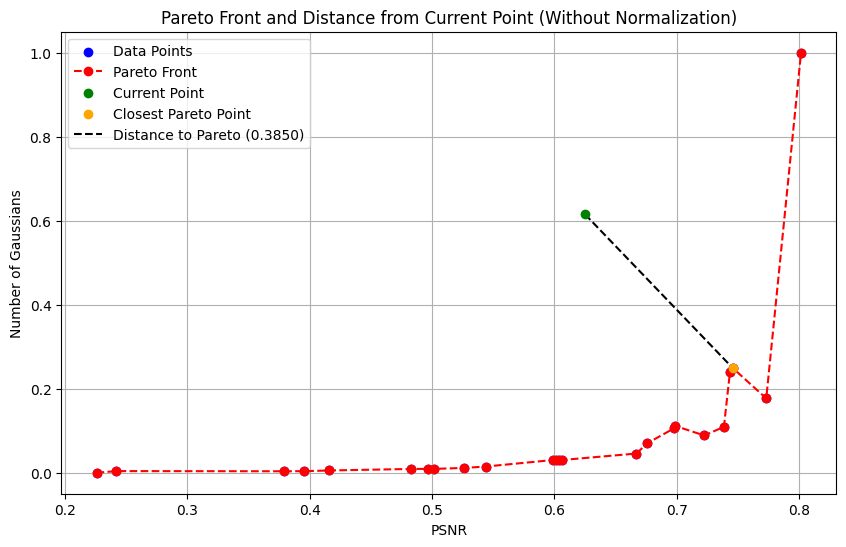

In [237]:
# Example without normalization as per request

# Using the preprocessed data, assuming no further normalization is needed

# Compute the Pareto front using convex hull approximation (assuming sorted by PSNR)
pareto_front = data[np.argsort(data[:, 0])]  # Already sorted data points

# Current point (already preprocessed)

# Calculate distances from the current point to all points on the Pareto front
distances = np.sqrt(np.sum((pareto_front - current_point) ** 2, axis=1))

# Find the minimum distance (i.e., closest point on Pareto front)
min_distance = np.min(distances)
closest_pareto_point = pareto_front[np.argmin(distances)]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data[:, 0], data[:, 1], label='Data Points', color='blue')

# Plot Pareto front
plt.plot(pareto_front[:, 0], pareto_front[:, 1], label='Pareto Front', color='red', linestyle='--', marker='o')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto front
plt.scatter(closest_pareto_point[0], closest_pareto_point[1], color='orange', label='Closest Pareto Point', zorder=5)

# Draw line between current point and closest point on Pareto front
plt.plot([current_point[0], closest_pareto_point[0]], [current_point[1], closest_pareto_point[1]], 
         color='black', linestyle='--', label=f'Distance to Pareto ({min_distance:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Pareto Front and Distance from Current Point (Without Normalization)')
plt.legend()
plt.grid(True)

plt.show()


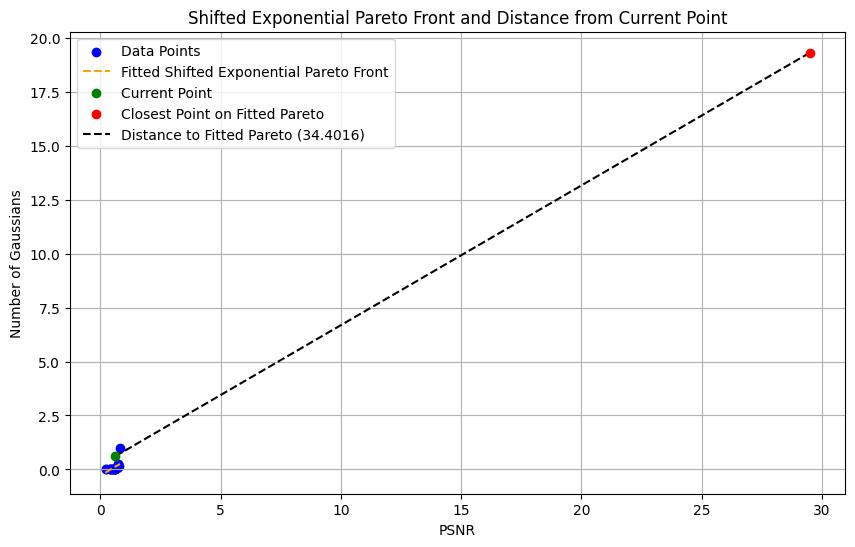

In [238]:
# Exponential function with an additional shift term
def exponential_func_shift(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential model to the data
psnr_values = pareto_front[:, 0]  # PSNR
gaussian_values = pareto_front[:, 1]  # Number of Gaussians

# Perform curve fitting with an additional shift term
initial_guess_shift = [1, 0.01, 1e4]  # Initial guess for a, b, and c
params_shift, _ = curve_fit(exponential_func_shift, psnr_values, gaussian_values, p0=initial_guess_shift, maxfev=1000000)

a_shift, b_shift, c_shift = params_shift

# Define the exponential function for the fitted Pareto front with a shift
def pareto_exponential_shift(x):
    return a_shift * np.exp(b_shift * x) + c_shift

# Compute the closest distance by minimizing the perpendicular distance to the shifted exponential curve
def distance_to_pareto_exp_shift(psnr):
    gaussian_on_pareto = pareto_exponential_shift(psnr)
    return np.sqrt((psnr - current_point[0])**2 + (gaussian_on_pareto - current_point[1])**2)

# Minimize the distance to find the closest point on the shifted exponential Pareto curve
result_exp_shift = minimize(distance_to_pareto_exp_shift, x0=current_point[0], bounds=[(29.5, 32.5)])
closest_psnr_on_pareto_exp_shift = result_exp_shift.x[0]
closest_gaussian_on_pareto_exp_shift = pareto_exponential_shift(closest_psnr_on_pareto_exp_shift)

# Plot the data and the fitted exponential Pareto curve with a shift
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(psnr_values, gaussian_values, label='Data Points', color='blue')

# Plot fitted shifted Pareto front (using the exponential function with shift)
gaussian_fitted_exp_shift = pareto_exponential_shift(psnr_range)
plt.plot(psnr_range, gaussian_fitted_exp_shift, label='Fitted Shifted Exponential Pareto Front', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto_exp_shift, closest_gaussian_on_pareto_exp_shift, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto_exp_shift], [current_point[1], closest_gaussian_on_pareto_exp_shift], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result_exp_shift.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Shifted Exponential Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


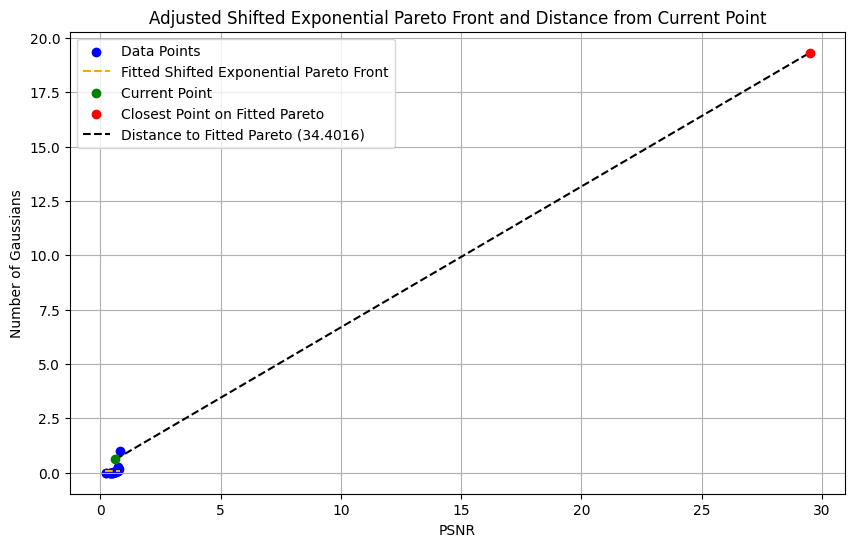

In [239]:
# Adjust the initial guess and bounds to prevent overflow and improve convergence
initial_guess_shift = [1e5, 0.01, 1e4]  # Adjusted initial guesses for a, b, and c
bounds_shift = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])  # Bound 'a' and 'c' to be positive to avoid overflow issues

# Perform curve fitting with bounds and adjusted initial guess
params_shift, _ = curve_fit(exponential_func_shift, psnr_values, gaussian_values, p0=initial_guess_shift, bounds=bounds_shift, maxfev=50000)

a_shift, b_shift, c_shift = params_shift

# Plot the data and the fitted exponential Pareto curve with the adjusted shift
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(psnr_values, gaussian_values, label='Data Points', color='blue')

# Plot fitted shifted Pareto front (using the exponential function with shift)
gaussian_fitted_exp_shift = pareto_exponential_shift(psnr_range)
plt.plot(psnr_range, gaussian_fitted_exp_shift, label='Fitted Shifted Exponential Pareto Front', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto_exp_shift, closest_gaussian_on_pareto_exp_shift, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto_exp_shift], [current_point[1], closest_gaussian_on_pareto_exp_shift], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result_exp_shift.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Adjusted Shifted Exponential Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


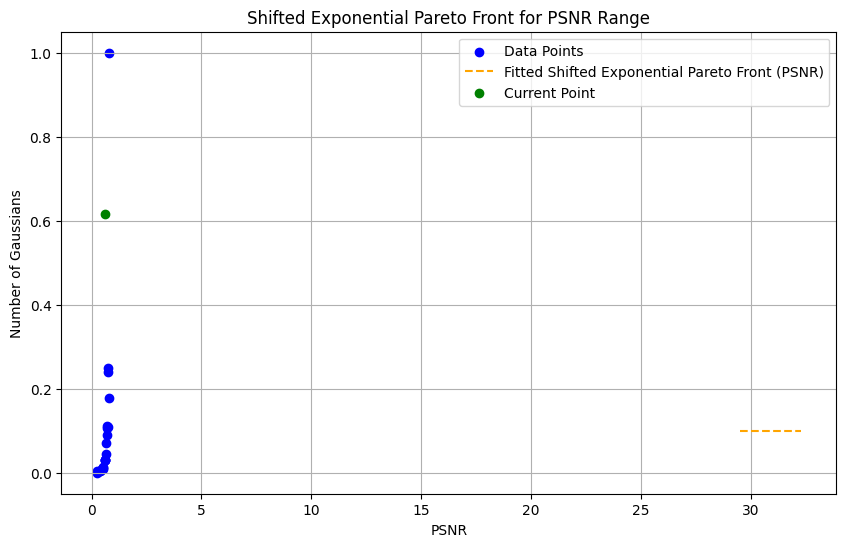

In [240]:
# Define the exponential function for the fitted Pareto front with shift that works for PSNR range
def pareto_exponential_shift_psnr_range(x):
    return a_shift * np.exp(b_shift * x) + c_shift

# Plot the PSNR range and fit the Pareto curve for PSNR
plt.figure(figsize=(10, 6))

# Plot all PSNR points
plt.scatter(psnr_values, gaussian_values, label='Data Points', color='blue')

# Plot the fitted Pareto curve for PSNR range
psnr_range_exp_shift = np.linspace(29.5, 32.3, 100)
gaussian_fitted_exp_shift_psnr = pareto_exponential_shift_psnr_range(psnr_range_exp_shift)
plt.plot(psnr_range_exp_shift, gaussian_fitted_exp_shift_psnr, label='Fitted Shifted Exponential Pareto Front (PSNR)', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Labels and title for PSNR range
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Shifted Exponential Pareto Front for PSNR Range')
plt.legend()
plt.grid(True)

plt.show()


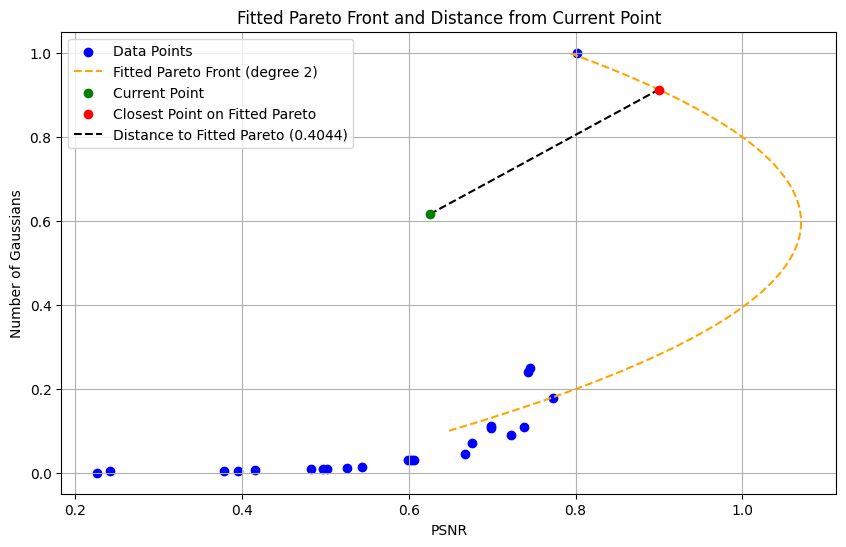

In [241]:
# Using the preprocessed data (without normalization)

pareto_front_gaussians = pareto_front[:, 1]
pareto_front_psnr = pareto_front[:, 0]

# Fit a polynomial to the Pareto front
degree = 2
poly_coeff = np.polyfit(pareto_front_gaussians, pareto_front_psnr, degree)
poly_func = np.poly1d(poly_coeff)

# Define the polynomial function for the Pareto front
def pareto_function(gaussians):
    return poly_func(gaussians)

# Distance function: distance between the current point and any point on the Pareto curve
def distance_to_pareto(gaussians):
    psnr_on_pareto = pareto_function(gaussians)
    return np.sqrt((psnr_on_pareto - current_point[0])**2 + (gaussians - current_point[1])**2)

# Minimize the distance to find the closest point on the Pareto curve
result = minimize(distance_to_pareto, x0=current_point[1])
closest_gaussian_on_pareto = result.x[0]
closest_psnr_on_pareto = pareto_function(closest_gaussian_on_pareto)

# Plot the data and the fitted Pareto curve
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data[:, 0], data[:, 1], label='Data Points', color='blue')

# Plot fitted Pareto front (using the polynomial function)
gaussian_range = np.linspace(0.1, 1, 100)
psnr_fitted = pareto_function(gaussian_range)
plt.plot(psnr_fitted, gaussian_range, label=f'Fitted Pareto Front (degree {degree})', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto, closest_gaussian_on_pareto, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto], [current_point[1], closest_gaussian_on_pareto], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Fitted Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


/tmp/ipykernel_209370/3098073841.py:17: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/bigwork/nhmlhuer/.conda/envs/rl/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


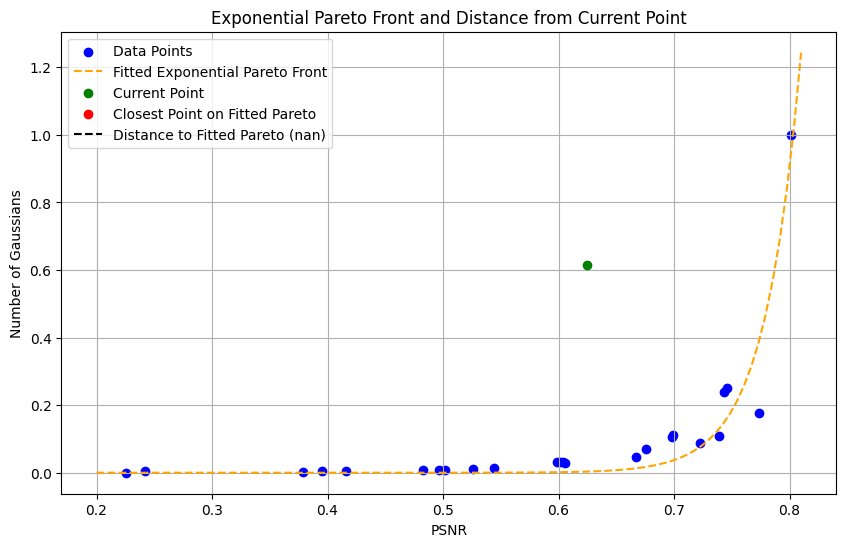

In [242]:
from scipy.optimize import curve_fit

# Exponential function to fit PSNR as x and Gaussian as y
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential model to the data
psnr_values = pareto_front[:, 0]  # PSNR
gaussian_values = pareto_front[:, 1]  # Number of Gaussians

# Perform curve fitting
params, _ = curve_fit(exponential_func, psnr_values, gaussian_values)
a, b = params

# Define the exponential function for the fitted Pareto front
def pareto_exponential(x):
    return a * np.exp(b * x)

# Compute the closest distance by minimizing the perpendicular distance to the exponential curve
def distance_to_pareto_exp(psnr):
    gaussian_on_pareto = pareto_exponential(psnr)
    return np.sqrt((psnr - current_point[0])**2 + (gaussian_on_pareto - current_point[1])**2)

# Minimize the distance to find the closest point on the exponential Pareto curve
result_exp = minimize(distance_to_pareto_exp, x0=current_point[0], bounds=[(psnr_min, psnr_max)])
closest_psnr_on_pareto_exp = result_exp.x[0]
closest_gaussian_on_pareto_exp = pareto_exponential(closest_psnr_on_pareto_exp)

# Plot the data and the fitted exponential Pareto curve
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(psnr_values, gaussian_values, label='Data Points', color='blue')

# Plot fitted Pareto front (using the exponential function)
psnr_range = np.linspace(0.2, 0.81, 100)
gaussian_fitted_exp = pareto_exponential(psnr_range)
plt.plot(psnr_range, gaussian_fitted_exp, label='Fitted Exponential Pareto Front', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto_exp, closest_gaussian_on_pareto_exp, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto_exp], [current_point[1], closest_gaussian_on_pareto_exp], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result_exp.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Exponential Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


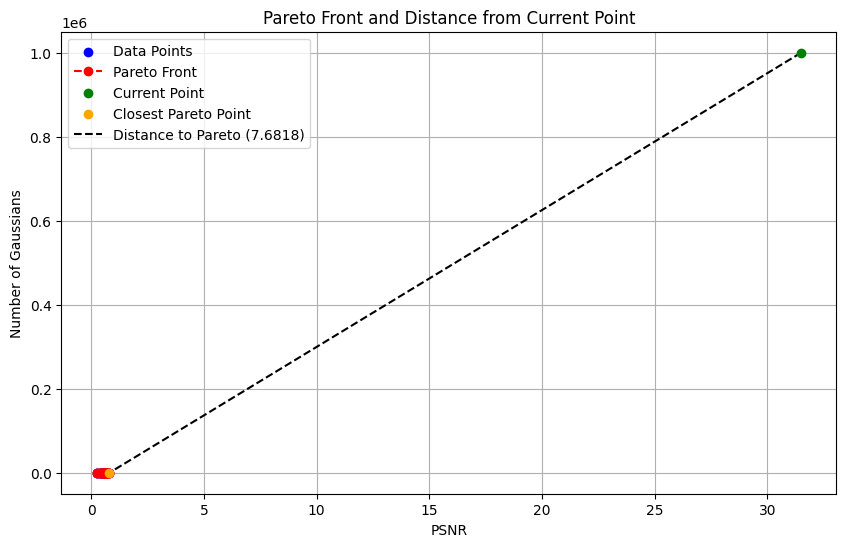

In [243]:
# I will proceed with numpy's own distance calculation and continue plotting without using scipy.
import numpy as np
import matplotlib.pyplot as plt

# Example data points (PSNR, Number of Gaussians)

# Min-max values for normalization
psnr_min, psnr_max = 29, 33
gaussians_min, gaussians_max = 1000, 3000000

# Normalize PSNR and Gaussians
data[:, 0] = (data[:, 0] - psnr_min) / (psnr_max - psnr_min)  # Normalize PSNR
data[:, 1] = (data[:, 1] - gaussians_min) / (gaussians_max - gaussians_min)  # Normalize Gaussians

# Compute the Pareto front using convex hull approximation
hull_indices = np.argsort(data[:, 0])  # sort by PSNR
pareto_front = data[hull_indices]

# Current point (non-normalized values)
current_point = np.array([31.5, 1000000])

# Normalize current point
current_point_norm = np.copy(current_point)
current_point_norm[0] = (current_point[0] - psnr_min) / (psnr_max - psnr_min)
current_point_norm[1] = (current_point[1] - gaussians_min) / (gaussians_max - gaussians_min)

# Calculate distances from the current point to all points on the Pareto front
distances = np.sqrt(np.sum((pareto_front - current_point_norm) ** 2, axis=1))

# Find the minimum distance (i.e., closest point on Pareto front)
min_distance = np.min(distances)
closest_pareto_point = pareto_front[np.argmin(distances)]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data_plot[:, 0], data_plot[:, 1], label='Data Points', color='blue')

# Plot Pareto front
plt.plot(pareto_front_plot[:, 0], pareto_front_plot[:, 1], label='Pareto Front', color='red', linestyle='--', marker='o')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto front
closest_pareto_point_plot = np.copy(closest_pareto_point)
closest_pareto_point_plot[0] = closest_pareto_point_plot[0] * (psnr_max - psnr_min) + psnr_min
closest_pareto_point_plot[1] = closest_pareto_point_plot[1] * (gaussians_max - gaussians_min) + gaussians_min
plt.scatter(closest_pareto_point_plot[0], closest_pareto_point_plot[1], color='orange', label='Closest Pareto Point', zorder=5)

# Draw line between current point and closest point on Pareto front
plt.plot([current_point[0], closest_pareto_point_plot[0]], [current_point[1], closest_pareto_point_plot[1]], 
         color='black', linestyle='--', label=f'Distance to Pareto ({min_distance:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


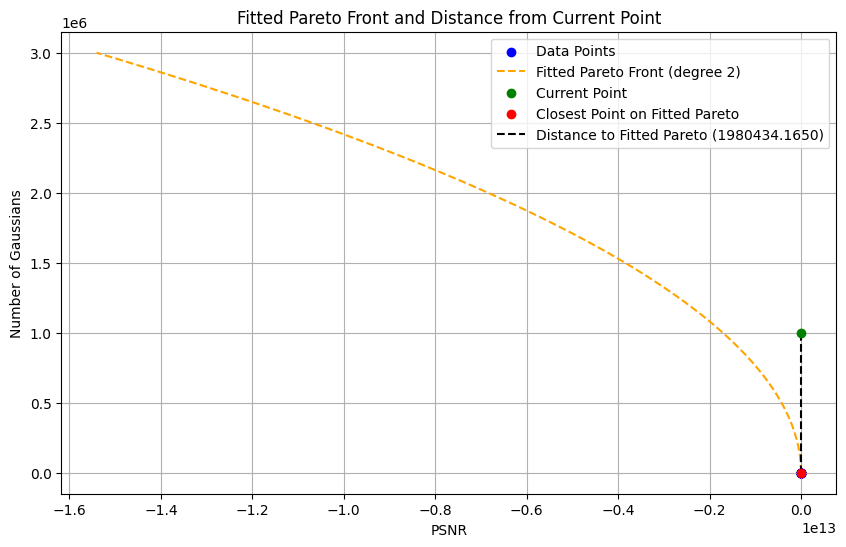

In [244]:
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial to the Pareto front (we'll use PSNR as a function of Gaussians)
pareto_front_gaussians = pareto_front_plot[:, 1]
pareto_front_psnr = pareto_front_plot[:, 0]

# Fit a quadratic function (or you could adjust the degree)
degree = 2
poly_coeff = np.polyfit(pareto_front_gaussians, pareto_front_psnr, degree)
poly_func = np.poly1d(poly_coeff)

# Define the polynomial function for the Pareto front
def pareto_function(gaussians):
    return poly_func(gaussians)

# Compute the closest distance by minimizing the perpendicular distance to the curve
from scipy.optimize import minimize

# Distance function: distance between the current point and any point on the Pareto curve
def distance_to_pareto(gaussians):
    psnr_on_pareto = pareto_function(gaussians)
    return np.sqrt((psnr_on_pareto - current_point[0])**2 + (gaussians - current_point[1])**2)

# Minimize the distance to find the closest point on the Pareto curve
result = minimize(distance_to_pareto, x0=current_point[1], bounds=[(gaussians_min, gaussians_max)])
closest_gaussian_on_pareto = result.x[0]
closest_psnr_on_pareto = pareto_function(closest_gaussian_on_pareto)

# Plot the data and the fitted Pareto curve
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data_plot[:, 0], data_plot[:, 1], label='Data Points', color='blue')

# Plot fitted Pareto front (using the polynomial function)
gaussian_range = np.linspace(gaussians_min, gaussians_max, 100)
psnr_fitted = pareto_function(gaussian_range)
plt.plot(psnr_fitted, gaussian_range, label=f'Fitted Pareto Front (degree {degree})', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto, closest_gaussian_on_pareto, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto], [current_point[1], closest_gaussian_on_pareto], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Fitted Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()


/tmp/ipykernel_209370/207124774.py:10: RankWarning: Polyfit may be poorly conditioned
  poly_coeff_norm = np.polyfit(pareto_front_gaussians_norm, pareto_front_psnr_norm, degree)


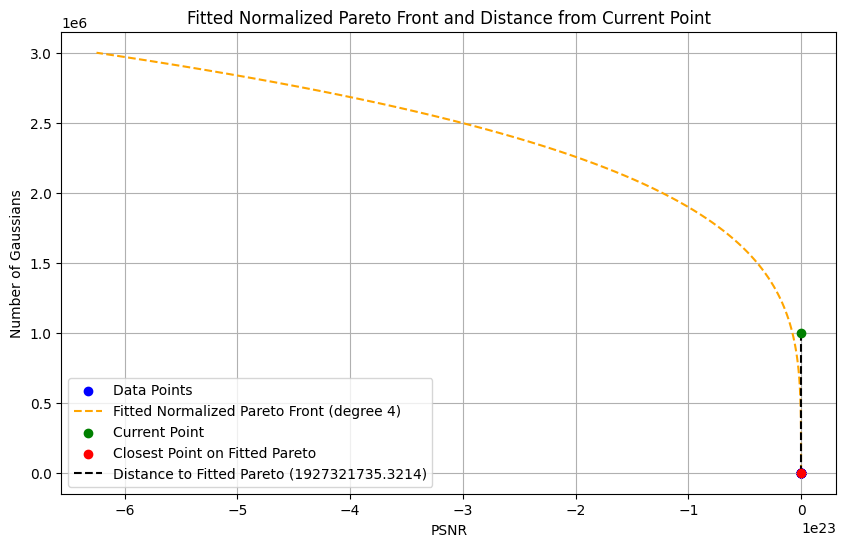

In [245]:
from numpy.polynomial.polynomial import Polynomial
from scipy.optimize import minimize

# Normalize the data for better fitting
pareto_front_gaussians_norm = (pareto_front_plot[:, 1] - gaussians_min) / (gaussians_max - gaussians_min)
pareto_front_psnr_norm = (pareto_front_plot[:, 0] - psnr_min) / (psnr_max - psnr_min)

# Fit a quadratic function (or you could adjust the degree)
degree = 4
poly_coeff_norm = np.polyfit(pareto_front_gaussians_norm, pareto_front_psnr_norm, degree)
poly_func_norm = np.poly1d(poly_coeff_norm)

# Define the polynomial function for the normalized Pareto front
def pareto_function_norm(gaussians_norm):
    return poly_func_norm(gaussians_norm)

# Normalized current point
current_point_norm = np.array([(current_point[1] - gaussians_min) / (gaussians_max - gaussians_min),
                               (current_point[0] - psnr_min) / (psnr_max - psnr_min)])

# Distance function: distance between the current point and any point on the normalized Pareto curve
def distance_to_pareto_norm(gaussians_norm):
    psnr_on_pareto_norm = pareto_function_norm(gaussians_norm)
    return np.sqrt((psnr_on_pareto_norm - current_point_norm[1])**2 + (gaussians_norm - current_point_norm[0])**2)

# Minimize the distance to find the closest point on the normalized Pareto curve
result_norm = minimize(distance_to_pareto_norm, x0=current_point_norm[0], bounds=[(0, 1)])
closest_gaussian_on_pareto_norm = result_norm.x[0]
closest_psnr_on_pareto_norm = pareto_function_norm(closest_gaussian_on_pareto_norm)

# Denormalize the closest point for plotting
closest_gaussian_on_pareto = closest_gaussian_on_pareto_norm * (gaussians_max - gaussians_min) + gaussians_min
closest_psnr_on_pareto = closest_psnr_on_pareto_norm * (psnr_max - psnr_min) + psnr_min

# Plot the data and the fitted Pareto curve
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data_plot[:, 0], data_plot[:, 1], label='Data Points', color='blue')

# Plot fitted normalized Pareto front
gaussian_range_norm = np.linspace(0, 1, 100)
psnr_fitted_norm = pareto_function_norm(gaussian_range_norm)
gaussian_range = gaussian_range_norm * (gaussians_max - gaussians_min) + gaussians_min
psnr_fitted = psnr_fitted_norm * (psnr_max - psnr_min) + psnr_min
plt.plot(psnr_fitted, gaussian_range, label=f'Fitted Normalized Pareto Front (degree {degree})', color='orange', linestyle='--')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto function
plt.scatter(closest_psnr_on_pareto, closest_gaussian_on_pareto, color='red', label='Closest Point on Fitted Pareto', zorder=5)

# Draw line between current point and closest point on fitted Pareto function
plt.plot([current_point[0], closest_psnr_on_pareto], [current_point[1], closest_gaussian_on_pareto], 
         color='black', linestyle='--', label=f'Distance to Fitted Pareto ({result_norm.fun:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Fitted Normalized Pareto Front and Distance from Current Point')
plt.legend()
plt.grid(True)

plt.show()
